# Quadratic Regression

Minimizing a quadratic function to find a best fit line and estimate an output value.

In [134]:
import pandas as pd
import plotly.express as px
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
from datascience import *

For the test a simulation of shooting a rock out of a slingshot is made. With angle shot as 'angle' and 'distance' as distance. The goal is to find a best fit line using quadratic regression. 

Start with visualizing the data on a scatter plot.

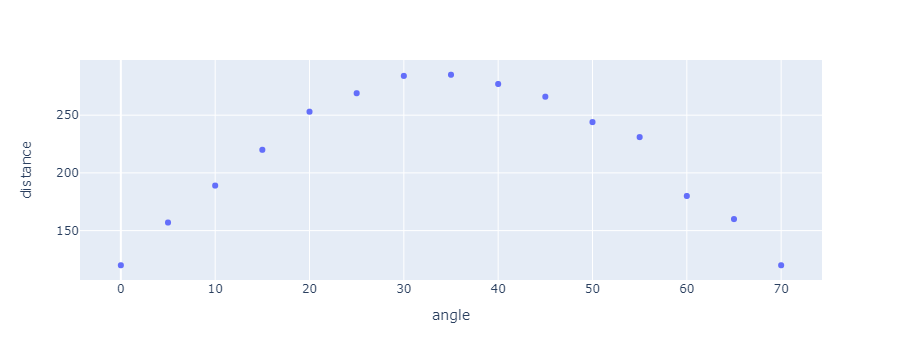

In [135]:
angle = np.arange(0,75,5)
15
throw_angle = pd.DataFrame()
throw_angle['angle'] = angle
distance = (120,157,189,220,253,269,284,285,277,266,244,231,180,160,120)
throw_angle['distance'] = distance
px.scatter(throw_angle, x= 'angle', y = 'distance')

Finding correlation will be useless in this situation due to the data not being linear. It will usually come out to a small value.

In [136]:
#Finds correlation between two columns in a table.
def correlation(table, col_x, col_y):
    def standard_units(z):
        """Converts an array x to standard units"""
        return (z - np.mean(z)) / np.std(z)
    x_su = standard_units(table[col_x])
    y_su = standard_units(table[col_y])
    return np.mean(x_su * y_su)

correlation(throw_angle, 'angle','distance')

-0.0062824086031333755

The method to find the best fit line here will be to minimize the Root Mean Squared Error(RMSE).

In [154]:
#A funciton that returns the a, b, and c values of a quadratic function that best fits the given data.
#Takes a table, x column, and y column. The minimize function is used to find a, b, and c values
#that minimized the RMSE.
def quadratic_RMSE(table, x, y):
    xv = table[x].values
    yv = table[y].values
    def quad_function(a,b,c):
        quad_fit = a*(xv**2) + b*xv + c
        #Returns RMSE given a, b, and c.
        return np.mean((y-quad_fit)**2)
    abcminimize = minimize(quad_function)
    return abcminimize

In [138]:
abc = quadratic_RMSE(throw_angle, 'angle', 'distance')
print('a = ',(abc[0]), ', b = ', (abc[1]),', c = ', (abc[2]))

a =  -0.1354848094345333 , b =  9.467508089858928 , c =  114.83235282153032


In [139]:
print('Therefore, y = ',(abc[0]),'x^2 + ',(abc[1]),'x + ',(abc[2])) 

Therefore, y =  -0.1354848094345333 x^2 +  9.467508089858928 x +  114.83235282153032


Compute an estimated value for each row.

In [147]:
xval = throw_angle['angle']
throw_angle['predicted'] = abc[0]*xval**2 + abc[1]*xval +abc[2]
throw_angle[:5]

,angle,distance,predicted
0,0,120,114.832353
1,5,157,158.782773
2,10,189,195.958953
3,15,220,226.360892
4,20,253,249.988591


Plot the best fit line on the data.

In [152]:
#Creates a simple graph that graphs the new predicted values on a scatter plot.
def best_fit_plot(table, x, y, predicted):
    plot.scatter(table[x].values, table[y].values);
    plot.plot(table[x].values,table[predicted].values);

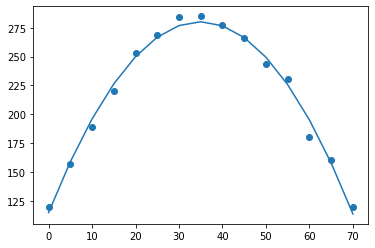

In [153]:
best_fit_plot(throw_angle, 'angle', 'distance','predicted')

In [ ]:
Check the to make sure the res